In [1]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'pima-indians-diabetes-database:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-data-sets%2F228%2F482%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240305%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240305T173424Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5d2cd7ae12fbad73a0df9877f704f5f9df65894a870b40d4c6debdf4f4acc204c73e9069fe03f50fac89395847830e155cdd3b75fc58574076778c4f4e3bb0ecc049055c3c360daab7b6895b276fafc2ef8a8025060fd099803dc0b55ff1db24f7fd57a762bf6410272db53c80b9ff4726a70604f4a996194c7e9fc2c9d66d6aeefa3980fd4b0d0deea743b2295c75c986a59b51e467daacf5c33519fe2c9aa923884a805d213aa34cefd0a7ff53391bcdd644a8f1ff2cc47b9cc6ea03a798cd969d9b9c94e8c9898b52c70a0e35c9cd7d5d57ca13e5b6f76119a083b7e443a48c1e3841b8728fe27d12b6d59933fa9e734963df50b15d4b4d93ee669850057b'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


[==================================================] 9128 bytes downloaded
Downloaded and uncompressed: pima-indians-diabetes-database
Data source import complete.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

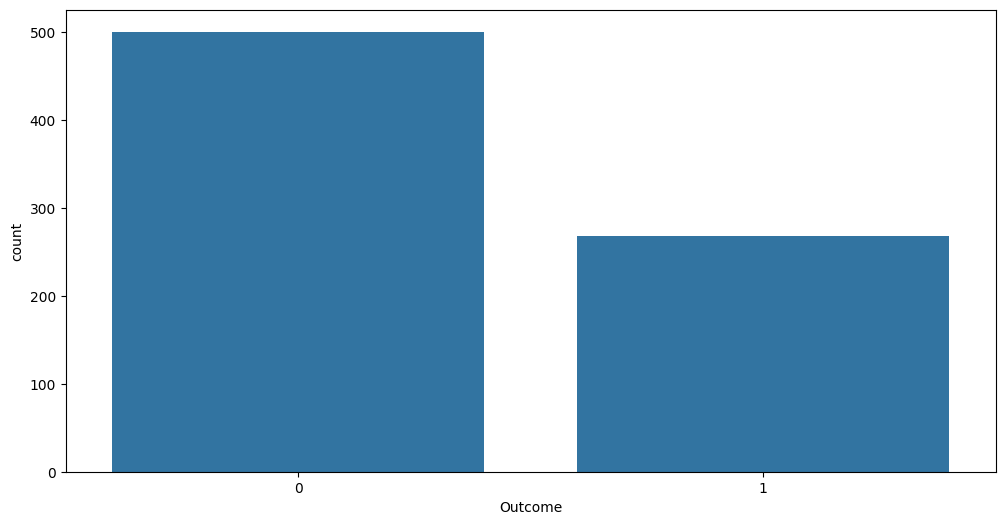

In [10]:
plt.figure(figsize = (12,6))
sns.countplot(x= 'Outcome', data = data)
plt.show()

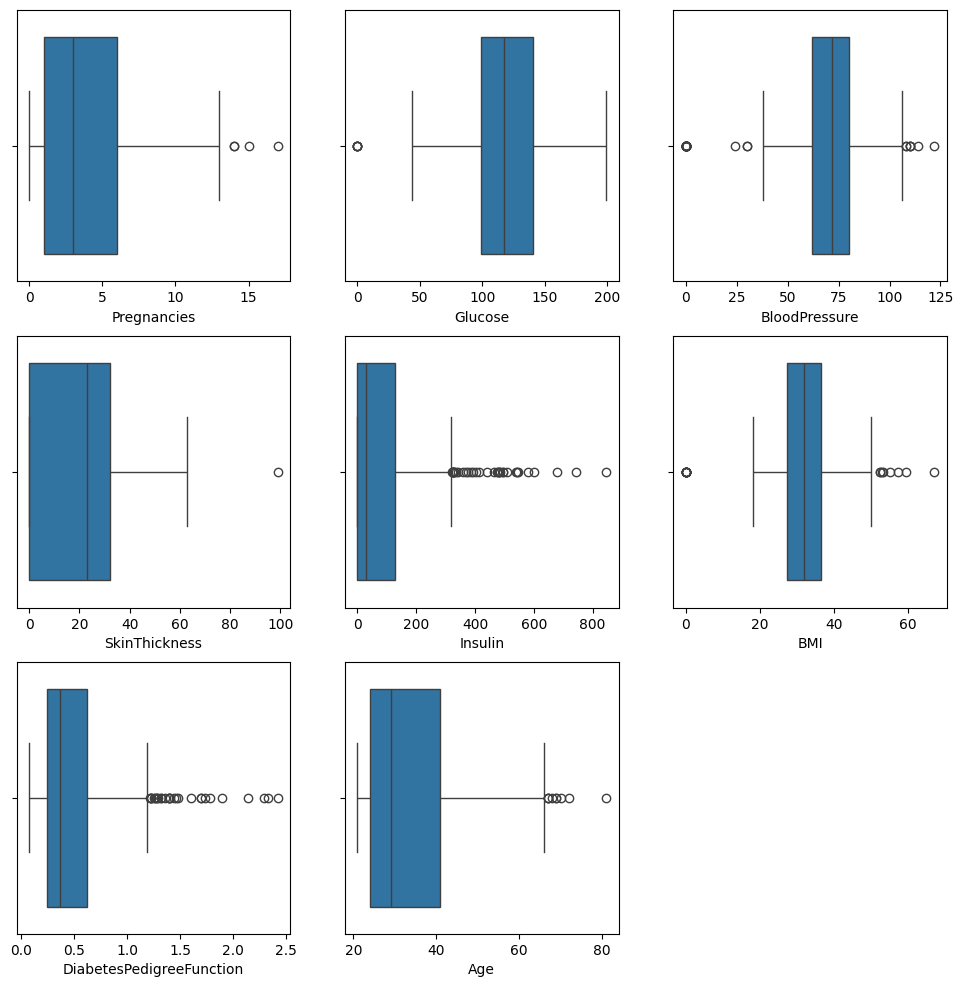

In [14]:
plt.figure(figsize = (12,12))
for i,col in enumerate (['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']):
    plt.subplot(3,3,i+1)
    sns.boxplot(x = col, data = data)
plt.show()

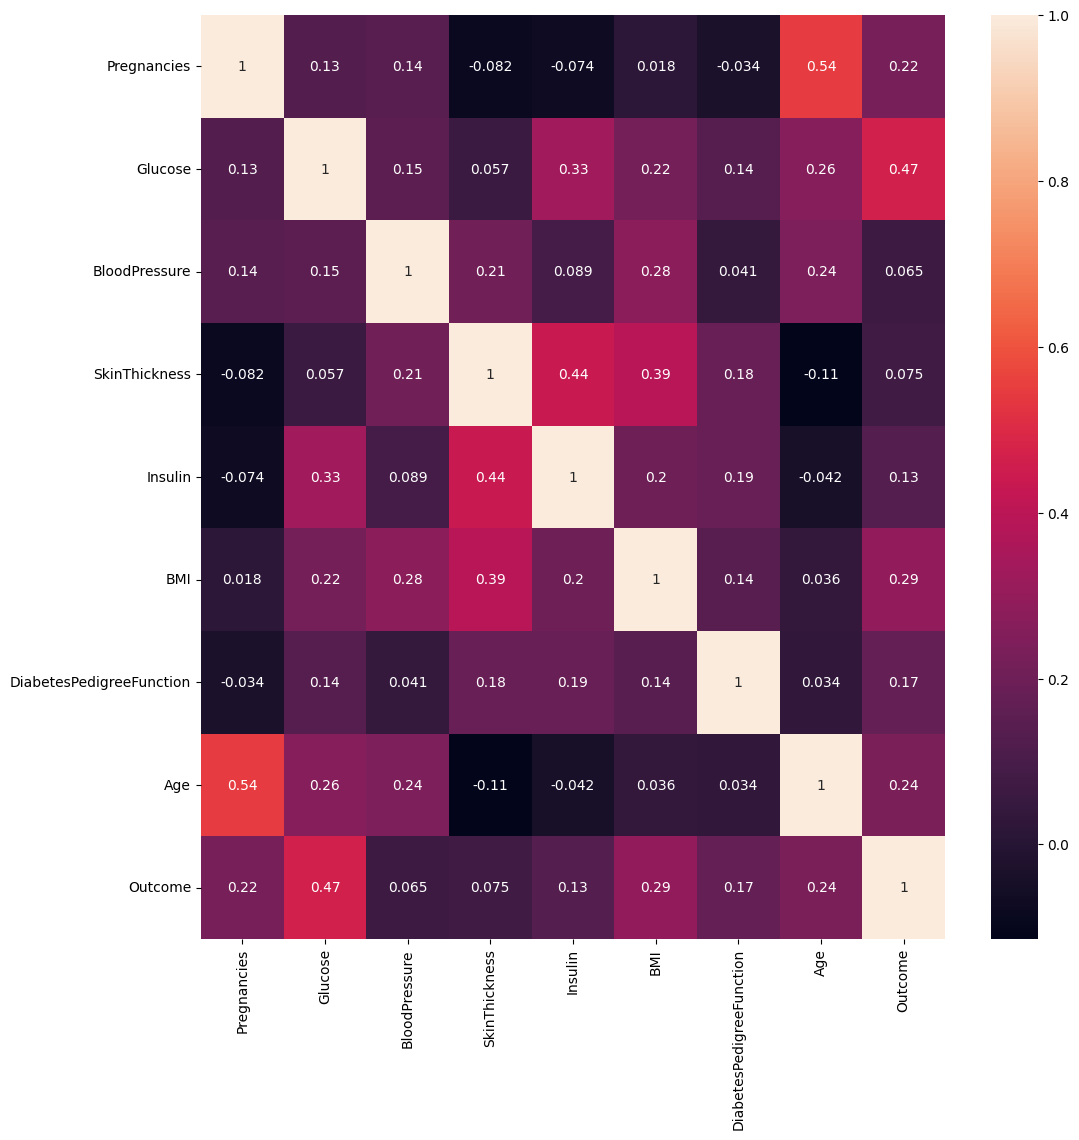

In [15]:
plt.figure(figsize=(12,12))
sns.heatmap(data.corr(), annot=True)
plt.show()


In [16]:
from sklearn.preprocessing import StandardScalar
sc_x = StandardSacalar()
x = pd.DataFrame(sc_x.fit_transform(data.drop(["Outcome"],axix = 1),), coloumns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

ImportError: cannot import name 'StandardScalar' from 'sklearn.preprocessing' (/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/__init__.py)

In [17]:
!pip install scikit-learn

In [18]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc_x = StandardScaler()

In [21]:
x = pd.DataFrame(sc_x.fit_transform(data.drop(["Outcome"], axis = 1),), columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [22]:
sc_x = StandardScaler()
x = pd.DataFrame(sc_x.fit_transform(data.drop(["Outcome"], axis = 1),), columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [24]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


In [25]:
y = data['Outcome']

In [27]:
from sklearn.model_selection import train_test_split

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
test_scores = []
train_scores = []

for i in range(1,15):
  knn = KNeighborsClassifier(i)
  knn.fit(x_train, y_train)

  train_scores.append(knn.score(x_train, y_train))
  test_scores.append(knn.score(x_test, y_test))

In [34]:
max_train_score = max(train_scores)
train_scores_index = [i for i, v in enumerate(train_scores) if v == max_train_score]
print ("Max train score {} % and k = {}".format(max_train_score*100, list(map(lambda x: x+1, train_scores_index))))

Max train score 100.0 % and k = [1]


In [35]:
max_test_score = max(test_scores)
test_scores_index = [i for i, v in enumerate(test_scores) if v == max_test_score]
print ("Max test score {} % and k = {}".format(max_test_score*100, list(map(lambda x: x+1, test_scores_index))))

Max test score 77.92207792207793 % and k = [13]


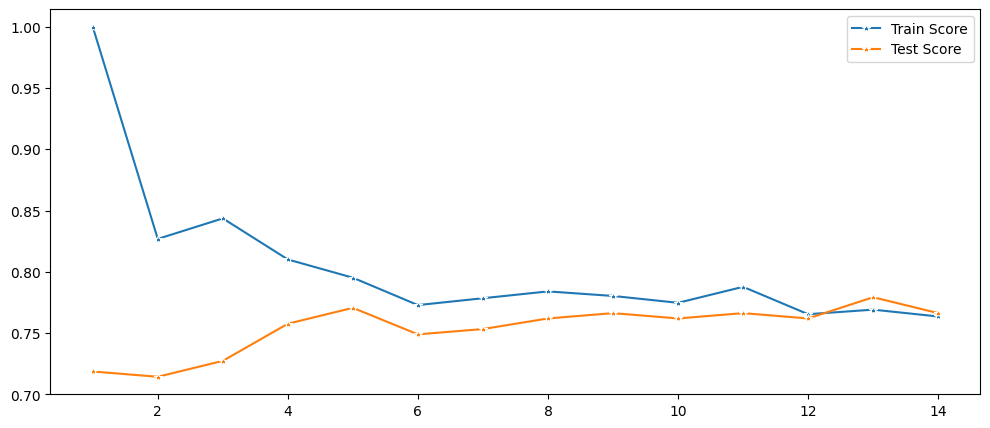

In [40]:
plt.figure(figsize = (12,5))
p = sns.lineplot(x=range(1,15), y=train_scores, marker = '*', label = "Train Score")
p = sns.lineplot(x=range(1,15), y=test_scores, marker = '*', label = "Test Score")
plt.show()

In [42]:
knn = KNeighborsClassifier(13)
knn.fit(x_train,y_train)
knn.score(x_test, y_test)

0.7792207792207793

In [44]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(x_test)
confusion_matrix(y_test,y_pred)

array([[141,  16],
       [ 35,  39]])

In [45]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.90      0.85       157
           1       0.71      0.53      0.60        74

    accuracy                           0.78       231
   macro avg       0.76      0.71      0.73       231
weighted avg       0.77      0.78      0.77       231

